In [112]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
%matplotlib inline

In [2]:
pwd

'C:\\Users\\munsu\\dataquest\\python'

In [3]:
terror = pd.read_csv("terror.csv", encoding = 'ISO-8859-1')

In [4]:
terror.shape

(181691, 135)

In [5]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
terror.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [7]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [8]:
terror = terror[['iyear','imonth','iday','extended','country_txt','region_txt','city','latitude','longitude','success','suicide', 'attacktype1_txt','targtype1_txt','targsubtype1_txt','target1','natlty1_txt','gname','gsubname','nperps','weaptype1_txt','nkill','nkillus']]

In [69]:
terror['imonth'].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: imonth, dtype: int64

In [70]:
terror = terror[terror.imonth != 0]

In [71]:
terror['imonth'].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
Name: imonth, dtype: int64

In [74]:
terror['iday'].value_counts()

15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
0      871
Name: iday, dtype: int64

In [77]:
terror['date'] = pd.to_datetime(terror['iyear'].apply(str) + '-' + terror['imonth'].apply(str))

In [78]:
terror['date'].head()

0   1970-07-01
2   1970-01-01
3   1970-01-01
4   1970-01-01
5   1970-01-01
Name: date, dtype: datetime64[ns]

In [79]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181671 entries, 0 to 181690
Data columns (total 23 columns):
iyear               181671 non-null int64
imonth              181671 non-null int64
iday                181671 non-null int64
extended            181671 non-null int64
country_txt         181671 non-null object
region_txt          181671 non-null object
city                181237 non-null object
latitude            177119 non-null float64
longitude           177118 non-null float64
success             181671 non-null int64
suicide             181671 non-null int64
attacktype1_txt     181671 non-null object
targtype1_txt       181671 non-null object
targsubtype1_txt    171299 non-null object
target1             181036 non-null object
natlty1_txt         180112 non-null object
gname               181671 non-null object
gsubname            5889 non-null object
nperps              110575 non-null float64
weaptype1_txt       181671 non-null object
nkill               171369 non-nul

In [88]:
terror.isnull().sum()

iyear                    0
imonth                   0
iday                     0
extended                 0
country_txt              0
region_txt               0
city                   434
latitude              4552
longitude             4553
success                  0
suicide                  0
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10372
target1                635
natlty1_txt           1559
gname                    0
gsubname            175782
nperps               71096
weaptype1_txt            0
nkill                10302
nkillus              64427
date                     0
dtype: int64

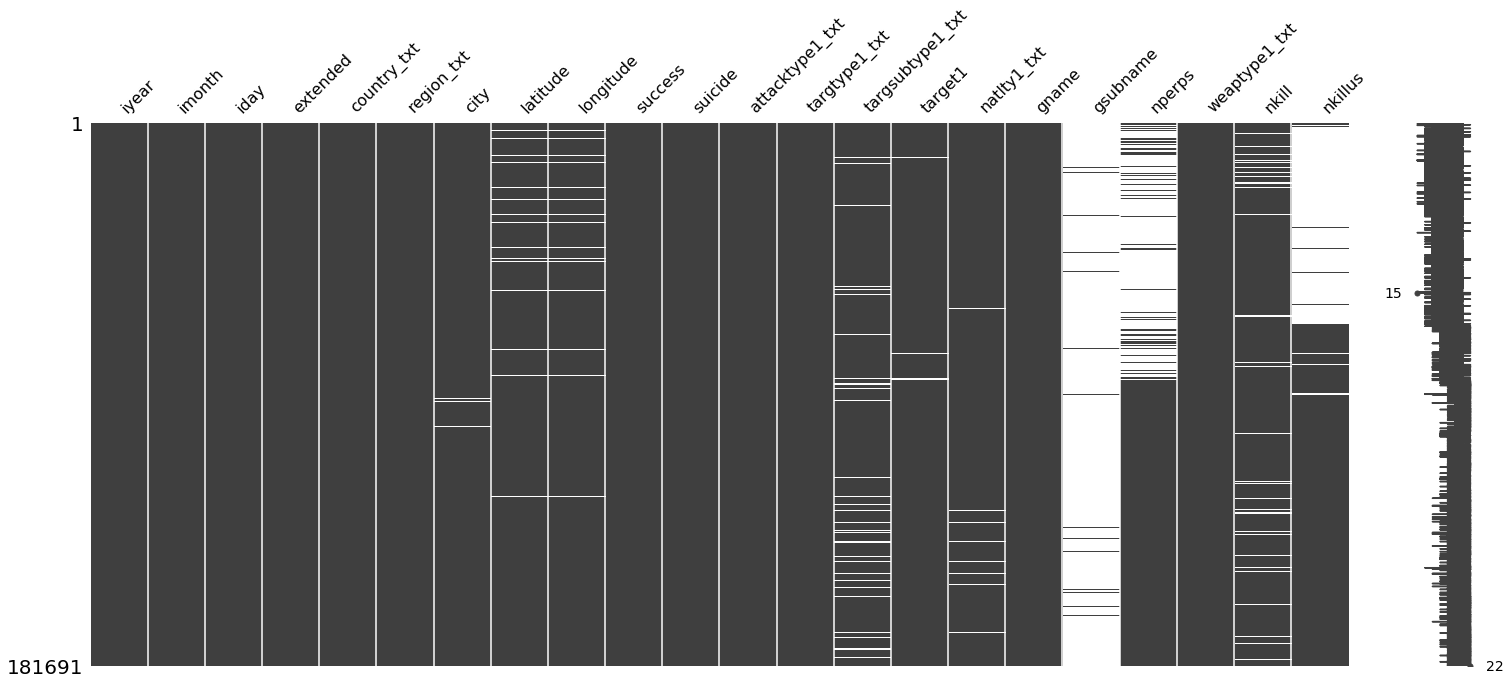

In [16]:
import missingno as msno

msno.matrix(terror)

In [98]:
terror['date'].head()

0   1970-07-01
2   1970-01-01
3   1970-01-01
4   1970-01-01
5   1970-01-01
Name: date, dtype: datetime64[ns]

In [119]:
group_month = terror.groupby('date')

In [127]:
plot1

date        date      
1970-01-01  1970-01-01      39
1970-02-01  1970-02-01      55
1970-03-01  1970-03-01      69
1970-04-01  1970-04-01      79
1970-05-01  1970-05-01      72
1970-06-01  1970-06-01      61
1970-07-01  1970-07-01      69
1970-08-01  1970-08-01      42
1970-09-01  1970-09-01      42
1970-10-01  1970-10-01      55
1970-11-01  1970-11-01      41
1970-12-01  1970-12-01      26
1971-01-01  1971-01-01      44
1971-02-01  1971-02-01      43
1971-03-01  1971-03-01      50
1971-04-01  1971-04-01      57
1971-05-01  1971-05-01      56
1971-06-01  1971-06-01      24
1971-07-01  1971-07-01      24
1971-08-01  1971-08-01      47
1971-09-01  1971-09-01      37
1971-10-01  1971-10-01      27
1971-11-01  1971-11-01      39
1971-12-01  1971-12-01      23
1972-01-01  1972-01-01      37
1972-02-01  1972-02-01      29
1972-03-01  1972-03-01      39
1972-04-01  1972-04-01      22
1972-05-01  1972-05-01      74
1972-06-01  1972-06-01      34
1972-07-01  1972-07-01      61
1972-08-01  1972

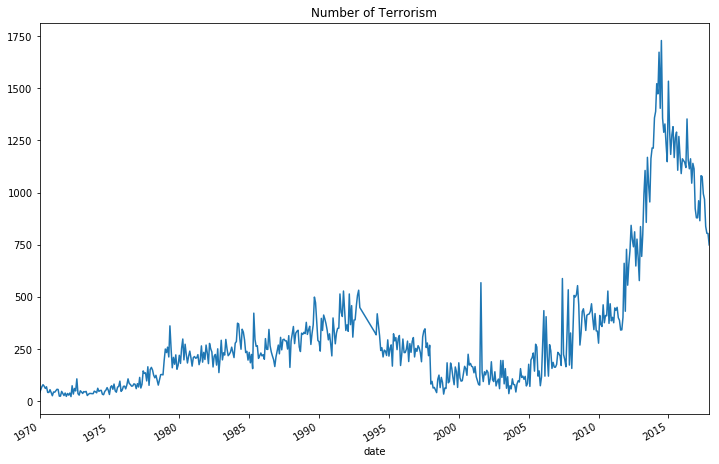

In [136]:
fig, ax = plt.subplots(figsize=(12, 8))
terror.groupby('date').count()['success'].plot(ax=ax,title = 'Number of Terrorism')

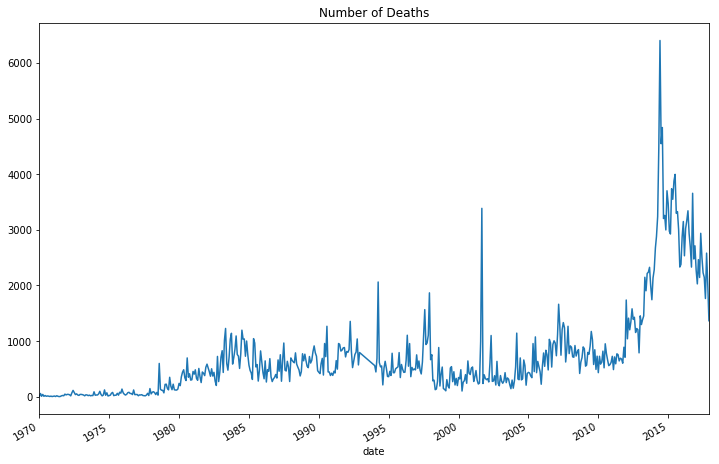

In [135]:
fig, ax = plt.subplots(figsize=(12, 8))
terror.groupby('date').sum()['nkill'].plot(ax=ax, title= 'Number of Deaths')

Number of deaths are correlated with the number of terrorism.

In [140]:
confirm911 = terror[(terror['date'] > '2000-01-01') & (terror['date'] <'2003-01-01')]

In [145]:
confirm911[confirm911['nkill'] == max(confirm911['nkill'])]

,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,nkill,nkillus,date
73126,2001,9,11,0,United States,North America,New York City,40.697132,-73.931351,1,1,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Passengers and crew members on American Airlin...,United States,Al-Qaida,NaN,5.0,Vehicle (not to include vehicle-borne explosiv...,1384.0,1360.0,2001-09-01


The spike between 2000 & 2005 is the year of 2011 when 911 terror happened.

Where does the most terrorism occur in the world?

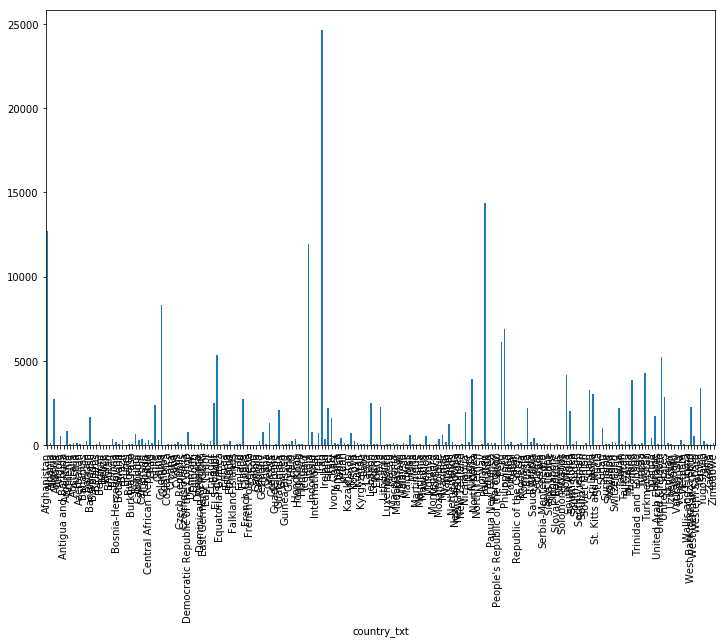

In [148]:
fig, ax = plt.subplots(figsize=(12, 8))
terror.groupby('country_txt').count()['success'].plot.bar(ax=ax)

In [154]:
terror.groupby('country_txt').count()['success'].sort_values(ascending=False)

country_txt
Iraq                                24636
Pakistan                            14367
Afghanistan                         12731
India                               11960
Colombia                             8304
Philippines                          6906
Peru                                 6096
El Salvador                          5319
United Kingdom                       5235
Turkey                               4290
Somalia                              4142
Nigeria                              3907
Thailand                             3849
Yemen                                3347
Spain                                3249
Sri Lanka                            3021
United States                        2836
Algeria                              2743
France                               2690
Egypt                                2479
Lebanon                              2478
Chile                                2365
Libya                                2249
West Bank and Gaza Str

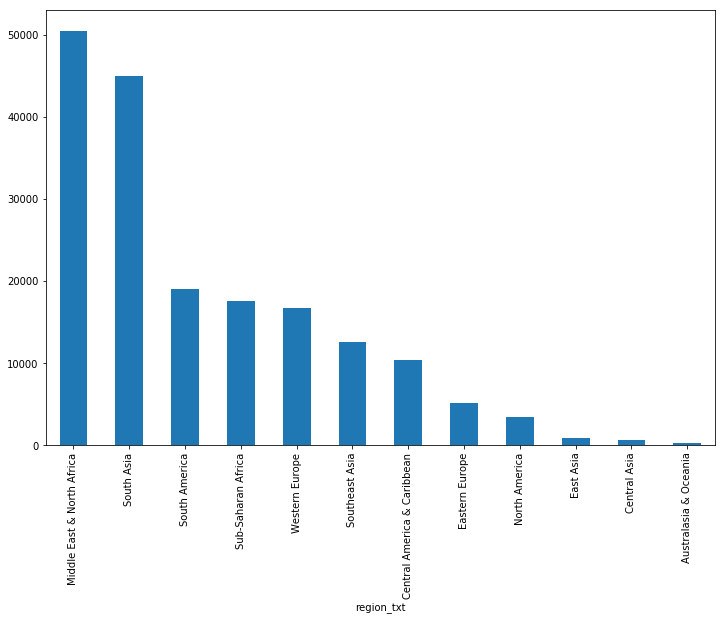

In [158]:
fig, ax = plt.subplots(figsize=(12, 8))
terror.groupby('region_txt').count()['success'].sort_values(ascending=False).plot.bar(ax=ax)

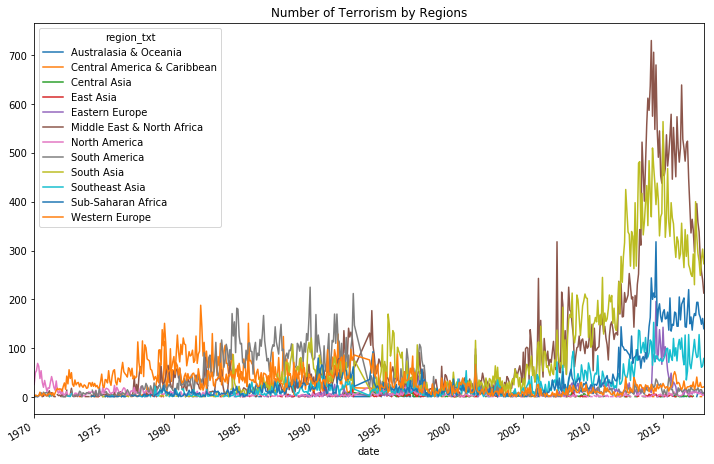

In [170]:
fig, ax = plt.subplots(figsize=(12, 8))
terror.groupby(['date','region_txt']).count()['success'].unstack().plot(ax=ax, title = "Number of Terrorism by Regions")

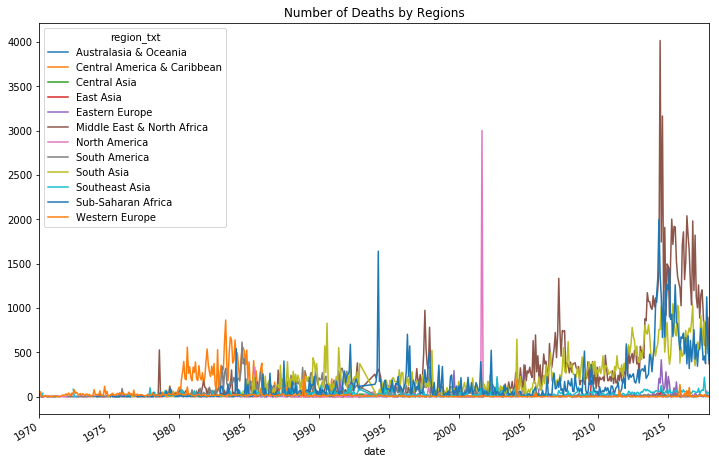

In [172]:
fig, ax = plt.subplots(figsize=(12, 8))
terror.groupby(['date','region_txt']).sum()['nkill'].unstack().plot(ax=ax, title = "Number of Deaths by Regions")

Middle East and North Africa is currently the region with the most terrorism